# Big Data y Machine Learning (UBA) 2025
## Clase 9 - Kernels

**Objetivo:**
Que se familiaricen con el segundo método no paramétrico - Kernels - para la estimación de la distribución de densidad de una variable aleatoria.

### Métodos no paramétricos
El objetivo es predecir distribución de una variable de interés 
- 𝑌 variable aleatoria de interés
- 𝑓(𝑌) distribución de densidad 𝑌

##### Métodos
- Breve repaso de Histogramas
- Kernels con Sckit-learn
    -  Tipo de funciones de kernels
    -  Opciones de Kernels: Ancho de banda $h$
    -  Simulación de datos: Sesgo de la estimación no parametrica de Kernels
- Kernels con Seaborn


In [1]:
# Importamos paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm #para crear datos de distribucion normal con otro modulo

import seaborn as sns
from sklearn.neighbors import KernelDensity

### Breve repaso de Histogramas


Estimamos la distribucion de densidad $f(Y)$ una variable aleatoria Y, con la siguiente aproximación no parametrica:

$$
\hat{f}(y) = \frac{M}{n} ∑^𝑛_i I(𝑌_𝑖 \in B_l)  
$$
Con $B_l$ barra (bin) $l$-ésimo

Podemos usar el atributo `hist` de Matplotlib. Ver documentación [acá](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

In [3]:
# Generamos datos
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,500), np.random.normal(5,1,500)]).reshape(-1,1)
X

array([[ 8.83893113e-01],
       [ 1.95865022e-01],
       [ 3.57536516e-01],
       [-2.34326191e+00],
       [-1.08483259e+00],
       [ 5.59696289e-01],
       [ 9.39469350e-01],
       [-9.78481042e-01],
       [ 5.03096840e-01],
       [ 4.06414469e-01],
       [ 3.23461010e-01],
       [-4.93410882e-01],
       [-7.92016791e-01],
       [-8.42367934e-01],
       [-1.27950266e+00],
       [ 2.45715170e-01],
       [-4.41948007e-02],
       [ 1.56763255e+00],
       [ 1.05110868e+00],
       [ 4.06368426e-01],
       [-1.68646101e-01],
       [-3.18970279e+00],
       [ 1.12013226e+00],
       [ 1.33277821e+00],
       [-2.43338766e-01],
       [-1.30030711e-01],
       [-1.09017371e-01],
       [ 1.55618644e+00],
       [ 1.28778353e-01],
       [-2.06694872e+00],
       [-8.85493155e-01],
       [-1.10457948e+00],
       [ 9.32866347e-01],
       [ 2.05983800e+00],
       [-9.34937958e-01],
       [-1.61299022e+00],
       [ 5.27069718e-01],
       [-1.55110074e+00],
       [ 3.2

In [7]:
X_df=pd.DataFrame(X)

In [9]:
X_df.describe()

,0
count,1000.000000
mean,2.499301
std,2.673057
min,-3.189703
25%,0.007142
50%,2.213003
75%,4.979662
max,7.887820


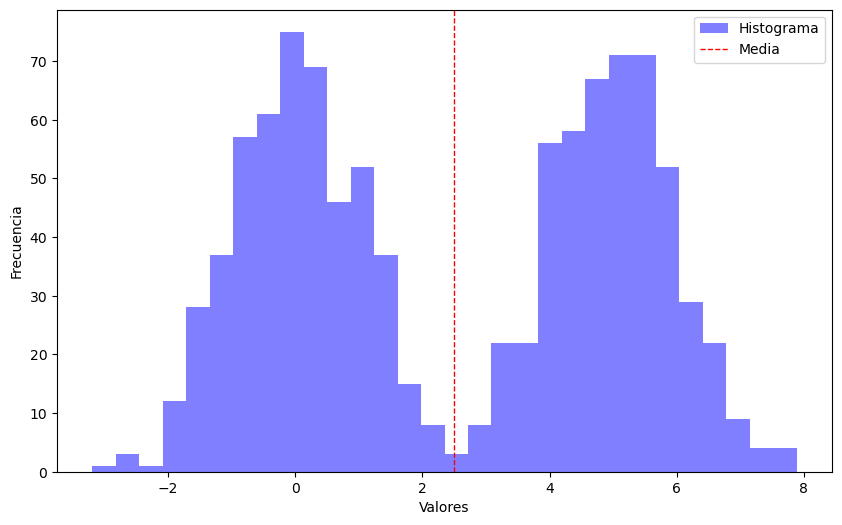

In [5]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, alpha=0.5, color='blue', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Agregamos línea vertical con la media
mean_value = np.mean(X)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.legend()  # Show legend with label for the mean line
plt.show()

## Kernels

Kernel:
A cada observación le estima una pequeña función de densidad y suma todas las pequeñas funciones

$$
𝑓(𝑦_0)= \frac{1}{n} ∑^𝑛_i  \frac{1}{h} 𝐾(\frac{𝑌_𝑖−𝑦_0}{h}) 
$$

- $K(z)$  función Kernel continua (y generalmente) simétrica 
- $h$ ancho de banda (smoothing bandwidth) --> Controla qué tan “suave” es la densidad 


Vamos a usar el [módulo neighbors de Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html)

Para estimar una densidad usando kernels tenemos la siguiente función: 

<code> sklearn.neighbors.KernelDensity(*, bandwidth=1.0, algorithm='auto', kernel='gaussian', metric='euclidean', atol=0, rtol=0, breadth_first=True, leaf_size=40, metric_params=None)</code>

donde algunos parámetros importantes son:
- <code>bandwidth</code> (valor por default: 1.0)
- <code>kernel</code> (valor por default: 'gaussian')

Scikit learn nos permite cambiar el kernel y probar varios y cuál ajusta mejor a los datos

Text(0.5, 1.0, 'Estimación con Kernel Gaussiano')

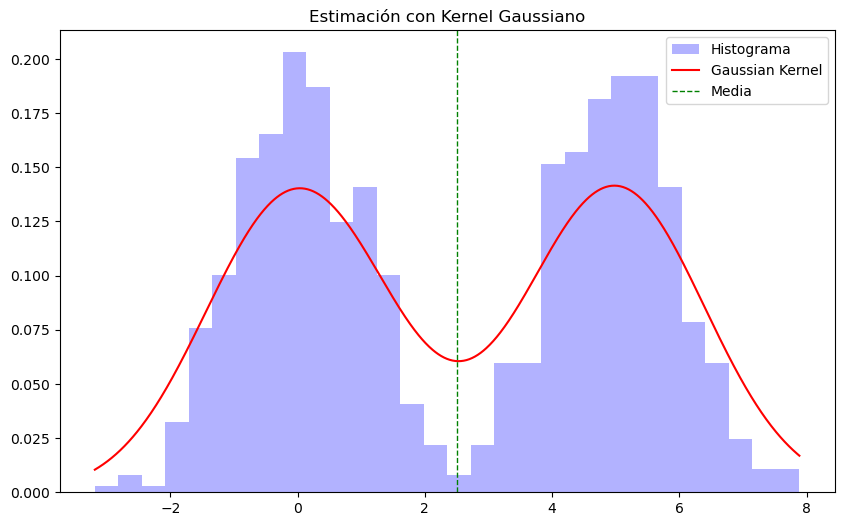

In [16]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, density=True, alpha=0.3, color='blue', label='Histograma') # mantenemos el histogramas para comparar

# Rango de valores para eje x (para graficar la funcion de Kernel)
X_plot = np.linspace(min(X), max(X), 1000).reshape(-1,1)

# Estimamos la funcion de Kernel Gaussiana y todas sus opciones de default
kde = KernelDensity().fit(X)
    
# Usar la KDE para estimar la densidad para cada valor de X
log_densities = kde.score_samples(X_plot)
densities = np.exp(log_densities)
    
# Grafico de kernel
plt.plot(X_plot[:,0], densities, color='red', label=f'Gaussian Kernel')

# Agregamos línea vertical con la media
mean_value = np.mean(X)
plt.axvline(mean_value, color='green', linestyle='dashed', linewidth=1, label='Media')

plt.legend()
plt.title('Estimación con Kernel Gaussiano')

#### Tipos de kernels (disponibles en Scikit learn)

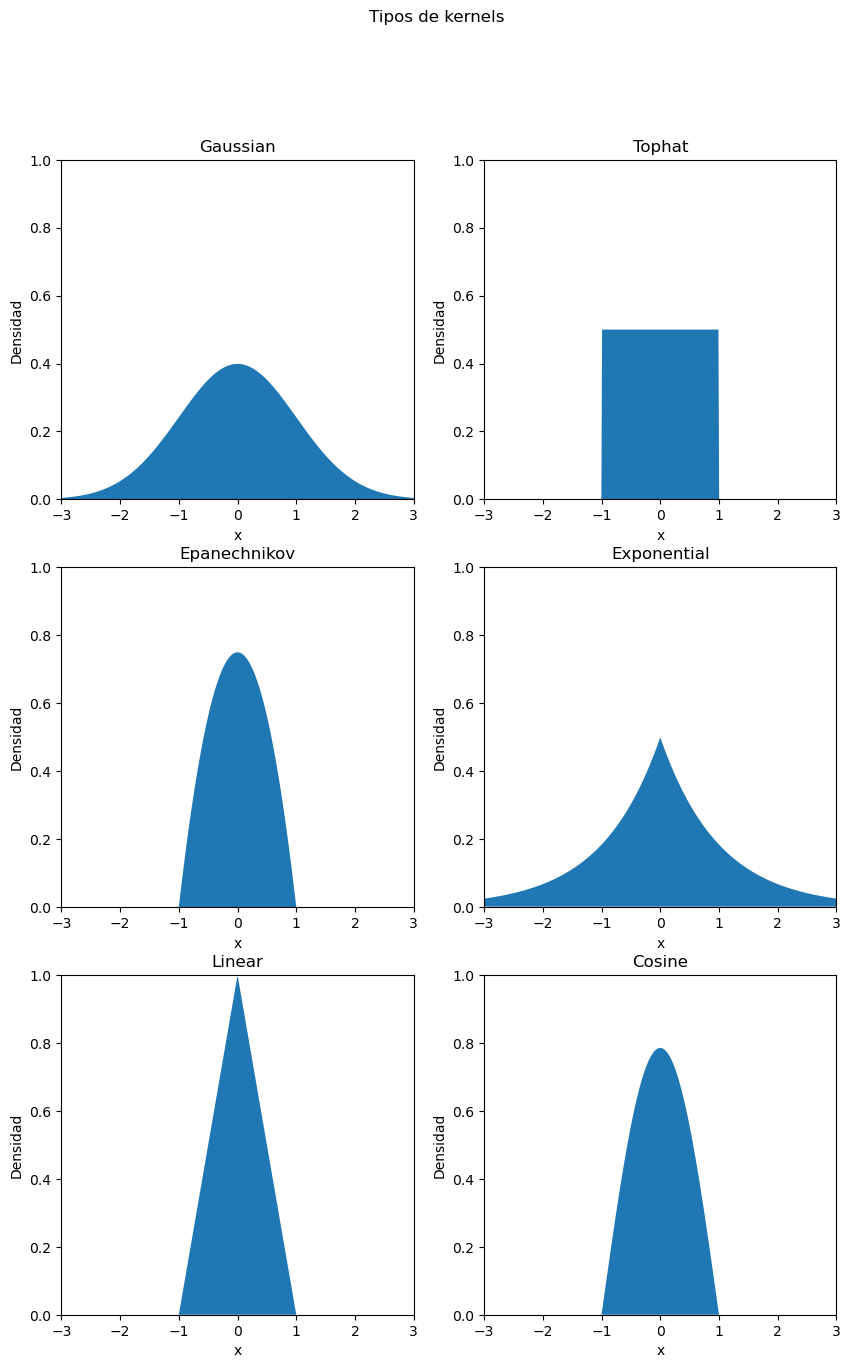

In [18]:
# Kernels
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 
  
# Figura con 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2) 
# Tamaño de la figura
fig.set_figheight(15) 
fig.set_figwidth(10)   
# Título 
fig.suptitle("Tipos de kernels") 

# 1D array de valores de x para graficar la distribución 
x_plot = np.linspace(-6, 6, 1000) # 1000 valores de -6 a 6 separados con la misma distancia entre sí
x_plot = x_plot.reshape(-1,1) # formato 2D array (necesario para scikit learn)
x_orig = np.zeros((1, 1)) # punto (0,0)
  
# Graficamos usando los distintos kernels 
for i, kernel in enumerate(kernels): 
    # Ajustamos el modelo 
    kde = KernelDensity(kernel=kernel).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
      
    # Distribuciones 
    ax[i // 2, i % 2].fill(x_plot[:, 0], np.exp(log_dens)) 
    # i//2 nos permite referirnos a la fila del subplot, e i%2 nos permite referirnos a la columna
    # Título y labels de los subplots 
    ax[i // 2, i % 2].set_title(kernel.capitalize()) 
    ax[i // 2, i % 2].set_xlim(-3, 3) 
    ax[i // 2, i % 2].set_ylim(0, 1) 
    ax[i // 2, i % 2].set_ylabel("Densidad") 
    ax[i // 2, i % 2].set_xlabel("x") 
plt.show()

De la misma forma, en un gráfico

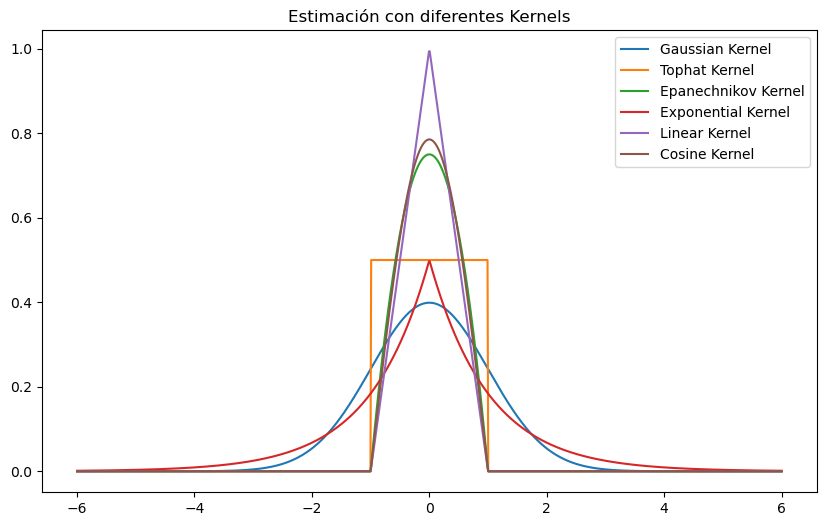

In [20]:
# Kernels
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 
  
# Grafico
plt.figure(figsize=(10,6))

for k in kernels:
    # Ajustamos el modelo 
    kde = KernelDensity(kernel=k).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
    
    # Graficar la estimacion para cada kernel
    plt.plot(x_plot[:,0], np.exp(log_dens), label=f'{k.capitalize()} Kernel')

plt.legend()
plt.title('Estimación con diferentes Kernels')
plt.show()

Continuamos con el ejemplo de la variable X creada (en la clase pasada) probando los distintos tipos de kernels

Text(0.5, 1.0, 'Estimación con diferentes Kernels')

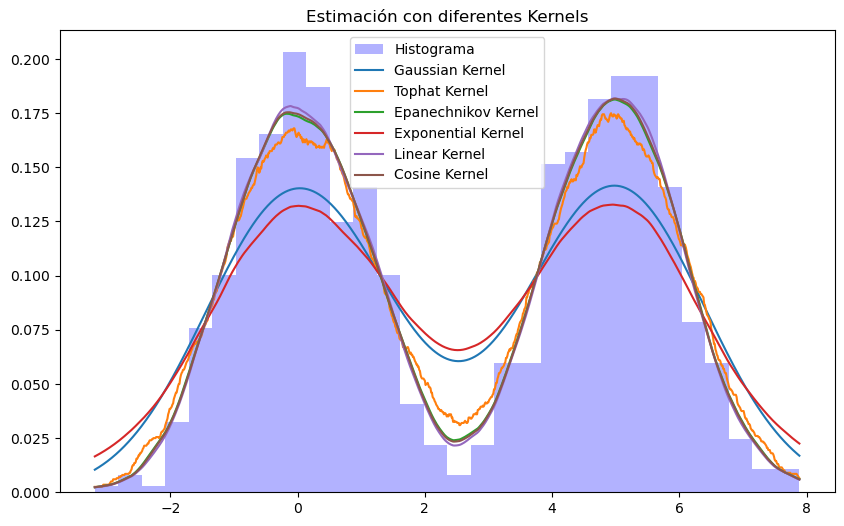

In [24]:
# Lista de kernels a probar
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"] 

# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, density=True, alpha=0.3, color='blue', label='Histograma')

for k in kernels:
    kde = KernelDensity(kernel=k).fit(X)
    
    # Usar la KDE para estimar la densidad para cada valor de X
    log_densities = kde.score_samples(X_plot)
    densities = np.exp(log_densities)
    
    # Graficar para cada kernel
    plt.plot(X_plot[:,0], densities, label=f'{k.capitalize()} Kernel')

plt.legend()
plt.title('Estimación con diferentes Kernels')

#### Opciones de Kernels: Ancho de banda $h$
Ahora veamos qué ocurre si para un mismo kernel, cambiamos los **anchos de banda**

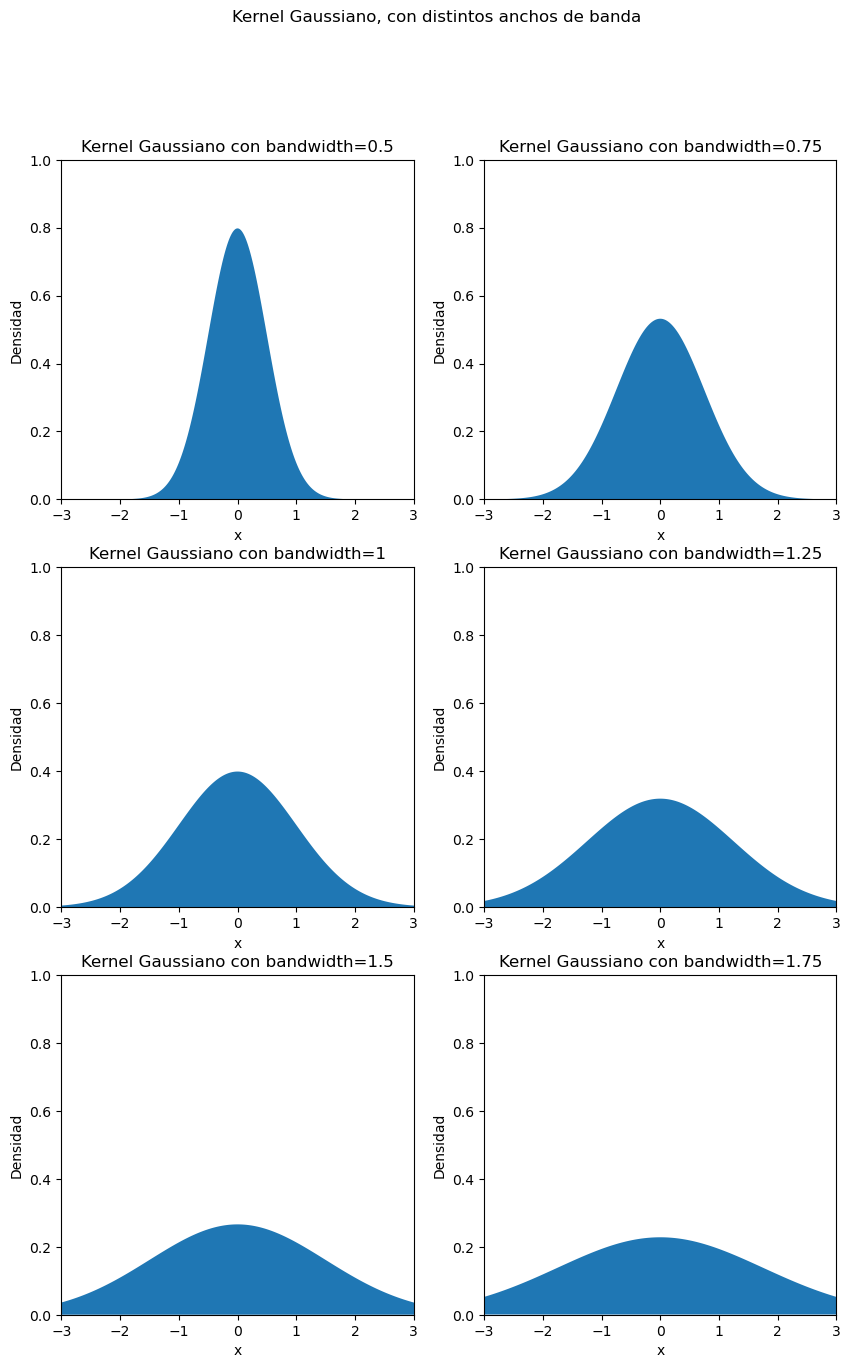

In [26]:
# Anchos de banda
bandwidths = [0.5, 0.75, 1, 1.25, 1.5, 1.75] 
  
# Figura con 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2) 
# Tamaño de la figura
fig.set_figheight(15) 
fig.set_figwidth(10)   
# Título 
fig.suptitle('Kernel Gaussiano, con distintos anchos de banda')

# Graficamos usando los distintos kernels 
for i, bw in enumerate(bandwidths): 
    # Ajustamos el modelo 
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
      
    # Distribuciones 
    ax[i // 2, i % 2].fill(x_plot[:, 0], np.exp(log_dens)) 
    # i//2 nos permite referirnos a la fila del subplot, e i%2 nos permite referirnos a la columna
    # Título y labels de los subplots 
    ax[i // 2, i % 2].set_title('Kernel Gaussiano con bandwidth='+str(bw)) 
    ax[i // 2, i % 2].set_xlim(-3, 3) 
    ax[i // 2, i % 2].set_ylim(0, 1) 
    ax[i // 2, i % 2].set_ylabel('Densidad') 
    ax[i // 2, i % 2].set_xlabel('x') 
plt.show()

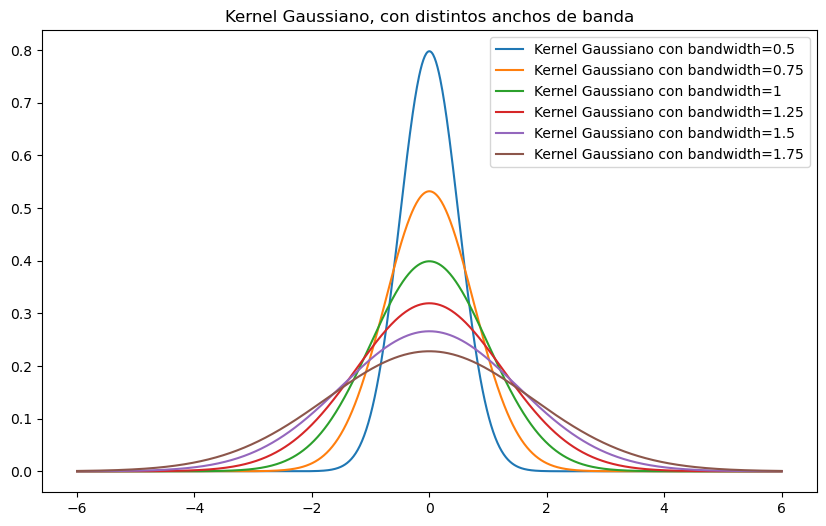

In [28]:
# Anchos de banda
bandwidths = [0.5, 0.75, 1, 1.25, 1.5, 1.75] 
  
# Grafico
plt.figure(figsize=(10,6))

for bw in bandwidths:
    # Ajustamos el modelo 
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x_orig) # usamos el punto (0,0)
    # log de la densidad de probabilidad (PDF)
    log_dens = kde.score_samples(x_plot) 
    
    # Graficar la estimacion para cada kernel
    plt.plot(x_plot[:,0], np.exp(log_dens), label='Kernel Gaussiano con bandwidth='+str(bw))

plt.legend()
plt.title('Kernel Gaussiano, con distintos anchos de banda') 
plt.show()

Text(0.5, 1.0, 'Estimación de Kernel Gaussiano con diferentes ancho de banda')

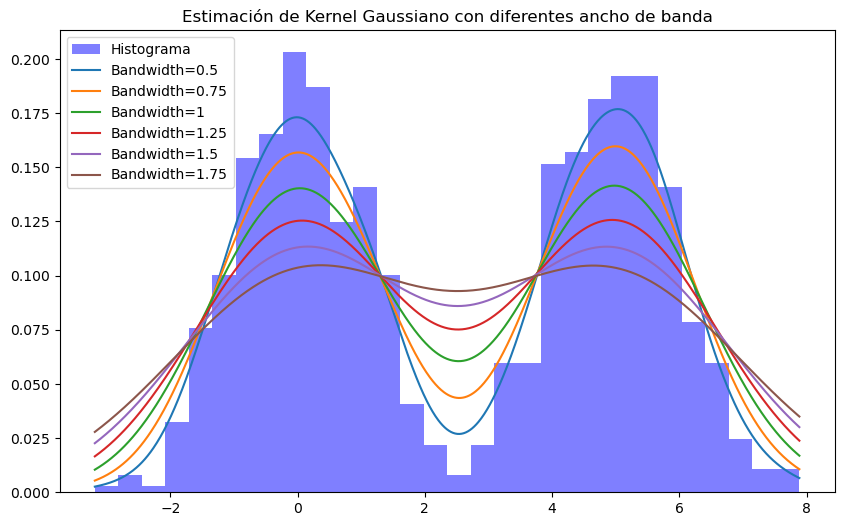

In [30]:
# Anchos de banda
bandwidths = [0.5, 0.75, 1, 1.25, 1.5, 1.75] 

# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, density=True, alpha=0.5, color='blue', label='Histograma')

for bw in bandwidths:
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X)
    
    # Usar la KDE para estimar la densidad para cada valor de X
    log_densities = kde.score_samples(X_plot)
    densities = np.exp(log_densities)
    
    # Graficar para cada kernel
    plt.plot(X_plot[:,0], densities, label='Bandwidth='+str(bw))

plt.legend()
plt.title('Estimación de Kernel Gaussiano con diferentes ancho de banda')

### Simulación de datos: Sesgo de la estimación no parametrica de Kernels
Ahora veamos un ejemplo donde creamos datos ficticios, esto implica que conocemos la verdadera forma en la que se generan los datos, para comparar la estimación no paramétrica de Kernels y su aproximación a la verdadera función de densidad. Se puede demostrar formalmente, que la estimación no paramétrica de Kernels (e histograma) es *sesgada*. Por lo que, aquí estamos ilustrando ese concepto.

In [ ]:
# Creamos una distribución
n = 10000000
np.random.seed(100)
X = np.concatenate((np.random.normal(0, 1, int(0.6 * n)), np.random.normal(10, 1, int(0.4 * n)))) 
# Creamos X concatenando datos de dos distribuciones normales
# primero 60 datos de una distribución normal con media 0 y desvío 1
# luego, 40 datos de una normal con media 10 y desvío 1
X = X.reshape(-1,1)

X_plot = np.linspace(-5, 15, 1000).reshape(-1,1)
# Usaremos X para estimar la densidad y calcularemos la densidad para los puntos de X_plot 

# Calcular la "verdera" densidad para los puntos X_plot
true_density = 0.6 * norm(0, 1).pdf(X_plot[:, 0]) + 0.4 * norm(10, 1).pdf(X_plot[:, 0]) 
  
# Gráfico
fig, ax = plt.subplots() 
  
# Gráfico de la verdadera densidad 
ax.fill( 
    X_plot[:, 0], true_density,  
    fc='black', alpha=0.2,  
    label='Verdadera Distribución'
) 
  
# Estimar la densidad de X usando kernel gaussiano y bandwidth de 0.5 
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X) 
# Log de la PDF 
log_dens = kde.score_samples(X_plot) 
  
# Densidad 
ax.plot( 
    X_plot[:, 0], np.exp(log_dens), 
    color='blue', 
    linestyle='-', 
    label='Densidad con kernel Gaussiano'
)  
ax.set_xlim(-4, 15) 
ax.set_ylim(0, 0.3) 
#ax.grid(True) 
ax.legend(loc='upper right')
plt.title('Sesgo de la estimación por Kernel') 

plt.show()

Para elegir el bandwidth con cross-validation (CV) que explicaremos en mayor detalle en la clase 8 tutorial 10.

In [ ]:
# Tarea para la casa: Mostrar el sesgo del histograma y esta funcion verdadera.

## Kernels con Seaborn
Continuaremos con el ejemplo utilizando la base de datos de propinas del modulo de `seaborn`. Para más información ver [seaborn](https://seaborn.pydata.org/)
La función de seaborn para graficar Kernels es [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [3]:
# Importamos la base de datos de propinas
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# veamos la estadistica descriptiva por grupo
tips.groupby('sex').describe().round(2).T

/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_5597/2727235171.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex').describe().round(2).T


sex                 Male  Female
total_bill count  157.00   87.00
           mean    20.74   18.06
           std      9.25    8.01
           min      7.25    3.07
           25%     14.00   12.75
           50%     18.35   16.40
           75%     24.71   21.52
           max     50.81   44.30
tip        count  157.00   87.00
           mean     3.09    2.83
           std      1.49    1.16
           min      1.00    1.00
           25%      2.00    2.00
           50%      3.00    2.75
           75%      3.76    3.50
           max     10.00    6.50
size       count  157.00   87.00
           mean     2.63    2.46
           std      0.96    0.94
           min      1.00    1.00
           25%      2.00    2.00
           50%      2.00    2.00
           75%      3.00    3.00
           max      6.00    6.00

<Axes: xlabel='tip', ylabel='Density'>

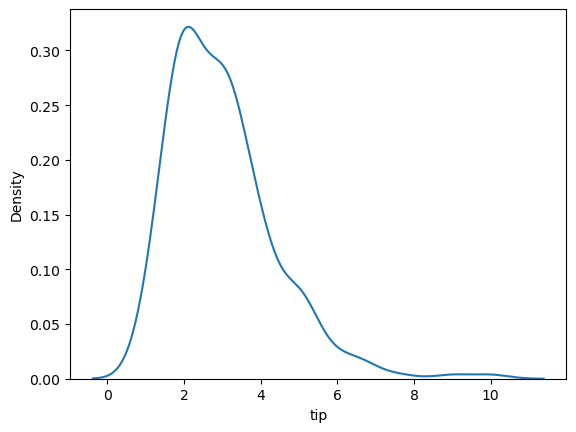

In [7]:
# Estimamos y graficamos la función por Kernels
sns.kdeplot(data=tips, x='tip') 

Nuevamente podemos mejorar el gráfico de seaborn usando las opciones de matplotlib

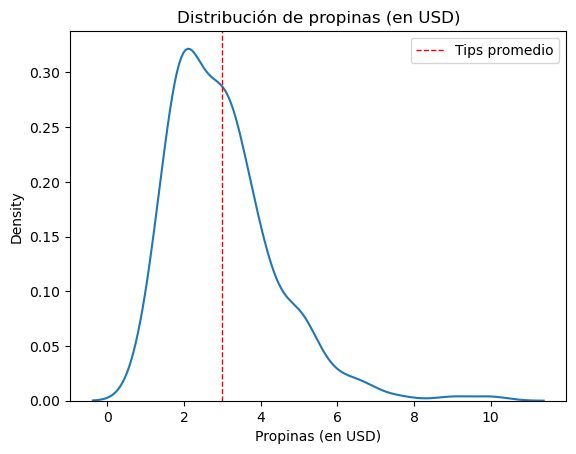

In [9]:
sns.kdeplot(data=tips, x='tip')  # funcion de kernel de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

También podemos hacer el grafico original del histograma (ver clase 8) y sumar con la opcion `kde=True`

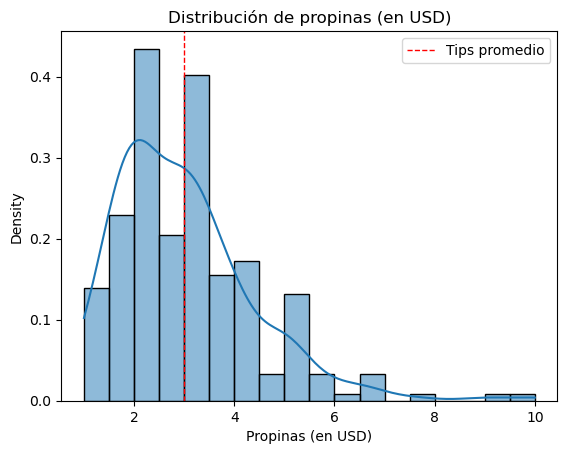

In [11]:
sns.histplot(data=tips['tip'], stat='density', kde=True) # funcion de histograma de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

Nuevamente, podemos comparar las distribuciones de densidad de kernel entre hombres y mujeres


In [13]:
# Checkeando el promedio de propinas
mean_tips_male = tips[tips['sex'] == 'Male']['tip'].mean()
print(mean_tips_male.round(2))
mean_tips_female = tips[tips['sex'] == 'Female']['tip'].mean()
print(mean_tips_female.round(2))

3.09
2.83


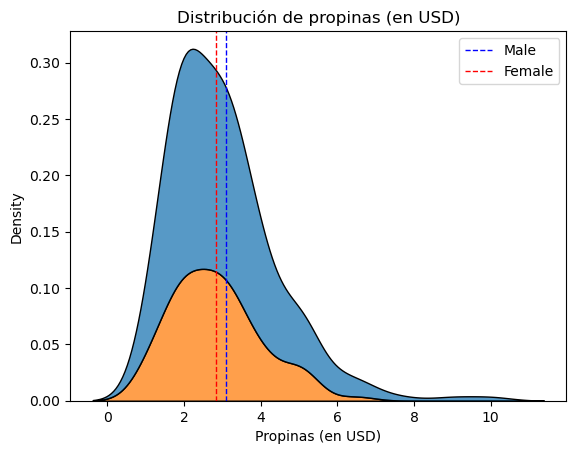

In [15]:
sns.kdeplot(data=tips, x='tip',hue="sex",  multiple="stack", )  # funcion de kernel de Seaborn

plt.axvline(mean_tips_male, color='blue', linestyle='dashed', linewidth=1, label='Male')
plt.axvline(mean_tips_female, color='red', linestyle='dashed', linewidth=1, label='Female')

plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

In [ ]:
# tarea para la casa: jugar con la opcion de ver este grafico en dos paneles y sumarle el valor del promedio de cada grupo